<a href="https://colab.research.google.com/github/rohitmaggu/face_recognition/blob/master/facenet%2Bfacebox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Facebox *Implementation*

In [20]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
ls

5-celebrity-faces-dataset.npz     drive/             sample_data/
5-celebrity-faces-embeddings.npz  face_recognition/


In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
!git clone https://github.com/rohitmaggu/face_recognition


fatal: destination path 'face_recognition' already exists and is not an empty directory.


In [24]:
cd face_recognition/


/content/face_recognition


In [25]:
%tensorflow_version 1.14 #added this because of Tensorflow has no attribute 'gfile' in Version 2.0.0.
import os
os.environ['CUDA_VISIBLE_DEVICES']='0,1'
import numpy as np
from PIL import Image,ImageDraw
import os
import cv2
import time
from face_detector import FaceDetector

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14 #added this because of Tensorflow has no attribute 'gfile' in Version 2.0.0.`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [26]:
cd ..

/content


In [27]:
ls

5-celebrity-faces-dataset.npz     drive/             sample_data/
5-celebrity-faces-embeddings.npz  face_recognition/


In [0]:
## Providing path for pretrained model of facebox
MODEL_PATH = './drive/My Drive/facenet/faceboxes/model.pb'
face_detector = FaceDetector(MODEL_PATH, gpu_memory_fraction=0.75, visible_device_list='0')
## Gpu memory can be adjusted by using gpu_memory_fraction parameters

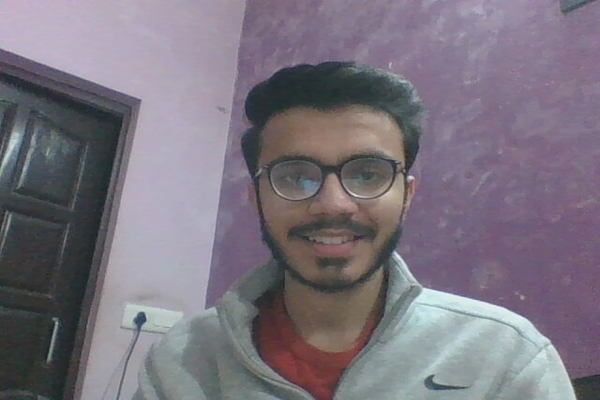

In [29]:
### Checking simply on a custom image 
### printing just image after resizing and transformation
path='./drive/My Drive/facenet/images/check1.jpg'
required_size=(600,400)
image_array=cv2.imread(path)
image_array=cv2.cvtColor(image_array,cv2.COLOR_BGR2RGB)
image=Image.fromarray(image_array)
image=image.resize(required_size)
image

In [0]:
## Darawing boxes around the face present in the image
## Confidence score indicates how sure model is in recosgnising faces
def draw_boxes_on_image(image,boxes,scores):
  image_copy=image.copy()
  draw=ImageDraw.Draw(image_copy,'RGBA')
  width,height=image.size

  for b,s in zip(boxes,scores):
    ymin,xmin,ymax,xmax=b
    fill=(255,0,0,45)
    outline='red'
    draw.rectangle(
        [(xmin,ymin),(xmax,ymax)],
        fill=fill,outline=outline
    )
    draw.text((xmin,ymin),text='{:.3f}'.format(s))
  
  return image_copy.resize(required_size)

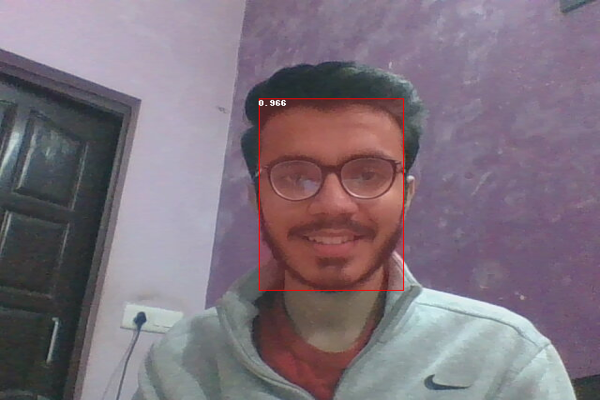

In [31]:
### drawing a rectangle around my face .....
boxes,scores=face_detector(image_array,score_threshold=0.3)
draw_boxes_on_image(Image.fromarray(image_array),boxes,scores)

# FaceBox+FaceNet Implementation

1 (160, 160, 3)
2 (160, 160, 3)
3 (160, 160, 3)
4 (160, 160, 3)
5 (160, 160, 3)
6 (160, 160, 3)
7 (160, 160, 3)
8 (160, 160, 3)
9 (160, 160, 3)
10 (160, 160, 3)
11 (160, 160, 3)
12 (160, 160, 3)
13 (160, 160, 3)
14 (160, 160, 3)


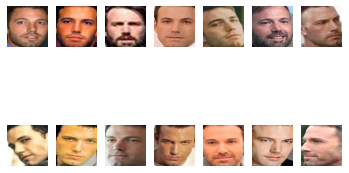

In [32]:
# demonstrate face detection on multiple faces at same time
# in this we are not drawing rectangle around faces, we are extracting the
# pixels of faces so that later these values can be used as input to our facenet model
# we can scale our images using required_size parameter
from os import listdir
from PIL import Image
from numpy import asarray
from matplotlib import pyplot
# function to extract a single face from a given photograph
# This functions returns the array of pixel values of face
def extract_face(filename,required_size=(160,160)):
  #load image from file
  image=Image.open(filename)
  #convert to RGB ,if needed
  image=image.convert('RGB')
  #convert to array
  pixels=asarray(image)
  # detect faces in the image using facebox pretrained model
	# Keep thresold low to avoid errors in coming 
  results=face_detector(pixels,score_threshold=0.3)
  # extract the bounding box from the first face 
  # If multiple face is present this function can be modified
  y1,x1,y2,x2=results[0][0]
  # changing values into integers because there are some float values
  y1,x1,y2,x2=int(y1),int(x1),int(y2),int(x2)
  # extract the face using list slicing 
  face=pixels[y1:y2,x1:x2]
  #resize pixels to te model size
  image=Image.fromarray(face)
  image=image.resize(required_size)
  face_array=asarray(image)
  return face_array
# specify image folder to plot
folder='./drive/My Drive/facenet/images/5-celebrity-faces-dataset/train/ben_afflek/'
i=1
for filename in listdir(folder):
  #path
  path=folder+filename
  #getface
  face=extract_face(path)
  print(i,face.shape)
  #plot
  pyplot.subplot(2,7,i)
  pyplot.axis('off')
  pyplot.imshow(face)
  i+=1
pyplot.show()


  


In [33]:
# face detection for the 5 Celebrity Faces Dataset
from os import listdir
from os.path import isdir
from PIL import Image
from matplotlib import pyplot
from numpy import savez_compressed
from numpy import asarray

# function to extract a single face from a given photograph
# This functions returns the array of pixel values of face

def extract_face(filename, required_size=(160, 160)):
  # load image from file
  image = Image.open(filename)
  # convert to RGB, if needed
  image = image.convert('RGB')
  # convert to array
  pixels = asarray(image)
  # detect faces in the image using facebox pretrained model
  results = face_detector(pixels,score_threshold=0.1)
  # extract the bounding box from the first face 
  # If multiple face is present this function can be modified
  y1, x1, y2, x2 = results[0][0]
  # changing values into integers because there are some float values as well 
  x1, y1,x2,y2 = int(x1), int(y1),int(x2), int(y2)

  # extract the face using list slicing 
  face = pixels[y1:y2, x1:x2]
  # resize pixels to the model size
  image = Image.fromarray(face)
  image = image.resize(required_size)
  face_array = asarray(image)
  return face_array
# load images and extract faces for all images in a directory
# This function extract all file from given directory and append them all 
# In a single numpy array using extract_face() function
def load_faces(directory):
  faces=list()
  #enumerate files
  for filename in listdir(directory):
    #path
    path=directory+filename
    #get face
    face=extract_face(path)
    #store
    faces.append(face)
  return faces
# load a dataset that contains one subdir for each class that in turn contains images
# this function loads dataset from train and validation sets and saves all of them in a array
def load_dataset(directory):
  X,y=list(),list()
  #enumerate folders,on per class
  for subdir in listdir(directory):
    #path
    path=directory+subdir+'/'
    # skip any files that might be in the dir
    if not isdir(path):
      continue
    #load all faces in the subdirectory
    faces=load_faces(path)
    #create labels
    labels=[subdir for _ in range(len(faces))]
    #summarize the process
    print('>loaded %d examples for class: %s' % (len(faces), subdir))
    X.extend(faces)
    y.extend(labels)
  return asarray(X), asarray(y)
# load train dataset
trainX, trainy = load_dataset('./drive/My Drive/facenet/images/5-celebrity-faces-dataset/train/')
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset('./drive/My Drive/facenet/images/5-celebrity-faces-dataset/val/')
print(testX.shape, testy.shape)
# save arrays to one file in compressed format
savez_compressed('5-celebrity-faces-dataset.npz', trainX, trainy, testX, testy)



>loaded 17 examples for class: elton_john
>loaded 21 examples for class: jerry_seinfeld
>loaded 22 examples for class: mindy_kaling
>loaded 14 examples for class: ben_afflek
>loaded 19 examples for class: madonna
(93, 160, 160, 3) (93,)
>loaded 5 examples for class: jerry_seinfeld
>loaded 5 examples for class: elton_john
>loaded 5 examples for class: ben_afflek
>loaded 5 examples for class: mindy_kaling
>loaded 5 examples for class: madonna
(25, 160, 160, 3) (25,)


In [0]:
!pip install -q keras

In [35]:
# calculate a face embedding for each face in the dataset using facenet
from numpy import load
from numpy import expand_dims
from numpy import asarray
from numpy import savez_compressed
from keras.models import load_model

# get the face embedding for one face using facenet pretrained model
def get_embedding(model, face_pixels):
	# scale pixel values
	face_pixels = face_pixels.astype('float32')
	# standardise pixel values across channels (global)
	# input images to the model need to be standardized
	mean, std = face_pixels.mean(), face_pixels.std()
	face_pixels = (face_pixels - mean) / std
	# transform face into one sample
	samples = expand_dims(face_pixels, axis=0)
	# make prediction to get embedding 
	# It will produce 128-D feature vector known as embedding
	yhat = model.predict(samples)
	return yhat[0]

# load the face dataset
data = load('5-celebrity-faces-dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)
# load the FACENET model
model = load_model('./drive/My Drive/facenet/model/facenet_keras.h5')
print('Loaded Model')
# convert each face in the train set to an embedding
newTrainX = list()
for face_pixels in trainX:
	embedding = get_embedding(model, face_pixels)
	newTrainX.append(embedding)
newTrainX = asarray(newTrainX)
print(newTrainX.shape)
# convert each face in the test set to an embedding
newTestX = list()
for face_pixels in testX:
	embedding = get_embedding(model, face_pixels)
	newTestX.append(embedding)
newTestX = asarray(newTestX)
print(newTestX.shape)
# save arrays to one file in compressed format
savez_compressed('5-celebrity-faces-embeddings.npz', newTrainX, trainy, newTestX, testy)

Loaded:  (93, 160, 160, 3) (93,) (25, 160, 160, 3) (25,)


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Loaded Model
(93, 128)
(25, 128)


In [36]:
ls


5-celebrity-faces-dataset.npz     drive/             sample_data/
5-celebrity-faces-embeddings.npz  face_recognition/


In [37]:
# develop a classifier for the 5 Celebrity Faces Dataset
from numpy import load
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
# load dataset
data = load('5-celebrity-faces-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))
# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)
# predict
yhat_train = model.predict(trainX)
yhat_test = model.predict(testX)
# score
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Dataset: train=93, test=25
Accuracy: train=98.925, test=100.000


Predicted: madonna (79.453)
Expected: madonna


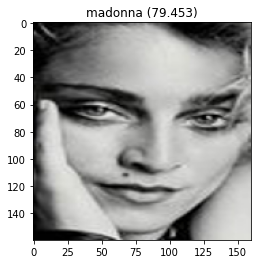

In [38]:
# develop a classifier for the 5 Celebrity Faces Dataset(continued)
from random import choice
from numpy import load
from numpy import expand_dims
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from matplotlib import pyplot
# load faces
data = load('5-celebrity-faces-dataset.npz')
testX_faces = data['arr_2']
# load face embeddings
data = load('5-celebrity-faces-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)
# test model on a random example from the test dataset
selection = choice([i for i in range(testX.shape[0])])
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])
# prediction for the face
samples = expand_dims(random_face_emb, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected: %s' % random_face_name[0])
# plot for fun
pyplot.imshow(random_face_pixels)
title = '%s (%.3f)' % (predict_names[0], class_probability)
pyplot.title(title)
pyplot.show()